In [35]:
import os

folder_path = 'scraped_tables/dorm_housing'
file_list = os.listdir(folder_path)
premium, room_in_mini_suite, room_in_suite, standard = [], [], [], []

for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    if file_name.startswith('Premium Room Projected Rates (Blackwell)'):
        premium.append(file_path)
    elif file_name.startswith('Room in Mini Suite'):
        room_in_mini_suite.append(file_path)
    elif file_name.startswith('Room in Suite'):
        room_in_suite.append(file_path)
    elif file_name.startswith('Standard'):
        standard.append(file_path)
    else:
        print('Unknown file:', file_name)

Unknown file: Premium Room Projected Rates (Over Winter Break)_2024-02-09.csv
Unknown file: Premium Room Projected Rates (Over Winter Break)_2024-07-13.csv
Unknown file: Premium Room Projected Rates (Over Winter Break)_2022-05-10.csv
Unknown file: Premium Room Projected Rates (Over Winter Break)_2022-03-03.csv
Unknown file: Premium Room Projected Rates (Over Winter Break)_2022-06-25.csv
Unknown file: Premium Room Projected Rates (Over Winter Break)_2024-08-22.csv
Unknown file: Premium Room Projected Rates (Over Winter Break)_2024-08-09.csv
Unknown file: Premium Room Projected Rates (Over Winter Break)_2024-04-20.csv
Unknown file: Premium Room Projected Rates (Over Winter Break)_2024-08-20.csv
Unknown file: Premium Room Projected Rates (Over Winter Break)_2024-08-08.csv
Unknown file: Premium Room Projected Rates (Over Winter Break)_2024-08-11.csv
Unknown file: Premium Room Projected Rates (Over Winter Break)_2022-01-27.csv
Unknown file: Premium Room Projected Rates (Over Winter Break)_2

In [ ]:
all_data = pd.DataFrame()

for ls in premium, room_in_mini_suite, room_in_suite, standard:
    dorm_data = pd.DataFrame()
    
    # Read in the data
    for file_path in ls:
        date = file_path.split('_')[-1].split('.')[0]
        df = pd.read_csv(file_path)
        df['date'] = [date] * len(df)
        df['dorm_type'] = file_path.split('/')[2].split('_')[0]
        dorm_data = dorm_data.append(df)

    # Clean the data
    dorm_data.rename(columns={'Unnamed: 0': 'room_type'}, inplace=True)
    
    all_data = all_data.append(dorm_data)   

all_data.sort_values(by=['date','dorm_type'], inplace=True)
all_data.reset_index(drop=True, inplace=True)
all_data = all_data[['dorm_type', 'room_type', 'Housing portion', 'date']]
all_data.to_csv('all_dorm_data.csv', index=False)

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def graph_eda_for_dorm_housing(file_list, housing_type):
    dorm_data = pd.DataFrame()
    
    # Read in the data
    for file_path in file_list:
        date = file_path.split('_')[-1].split('.')[0]
        df = pd.read_csv(file_path)
        df['date'] = [date] * len(df)
        dorm_data = dorm_data.append(df)

    # Clean the data
    dorm_data.rename(columns={'Unnamed: 0': 'room_type'}, inplace=True)
    dorm_data.sort_values(by='date', inplace=True)
    dorm_data.reset_index(drop=True, inplace=True)

    # Plot the results
    # Assuming dorm_data is already loaded and has a 'date' column as datetime
    # If not, ensure the 'date' column is converted
    dorm_data['date'] = pd.to_datetime(dorm_data['date'])
    dorm_data['Housing portion'] = dorm_data['Housing portion'].replace('[\$,]', '', regex=True).astype(float)

    # Set up the plot using seaborn and matplotlib
    plt.figure(figsize=(12, 6))

    # Use seaborn's lineplot for better aesthetics
    sns.lineplot(x='date', y='Housing portion', hue='room_type', 
                data=dorm_data, 
                markers=True, style='room_type', dashes=False)

    # Customize the x-axis to ensure it's properly proportionate to time
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=3))  # Adjust interval if needed

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add labels and title
    plt.title(f'{housing_type} Housing Cost Over Time')
    plt.xlabel('Date')
    plt.ylabel('Housing Cost ($)')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'eda_graphs/{housing_type}_housing_cost_trend.png', dpi=300)

    # Show the plot
    plt.show()

    

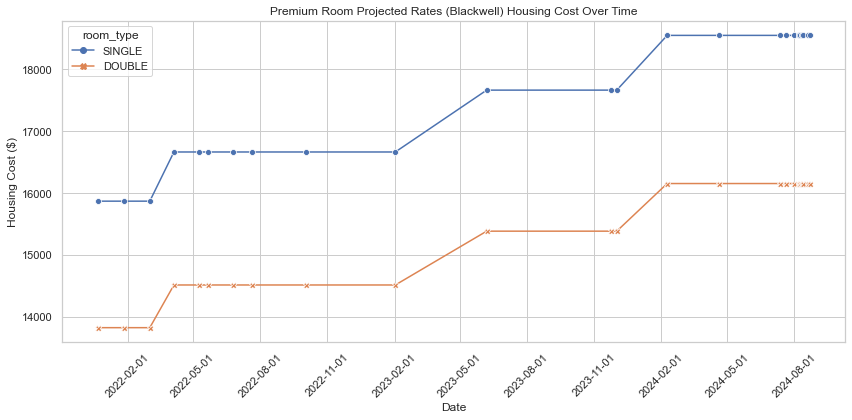

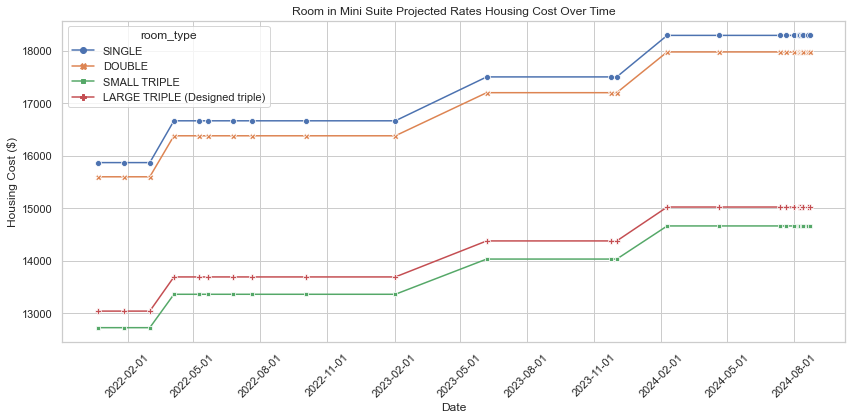

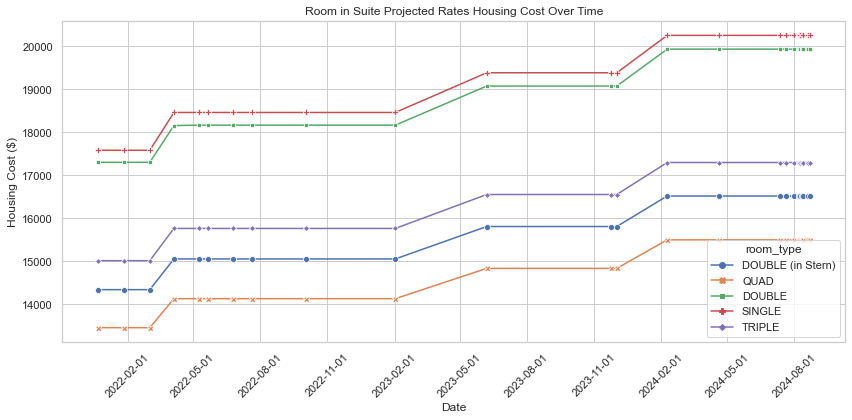

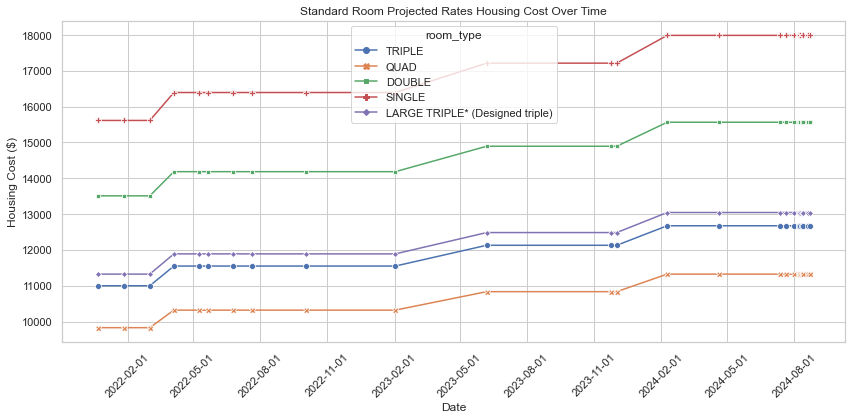

In [86]:
for ls in premium, room_in_mini_suite, room_in_suite, standard:
    graph_eda_for_dorm_housing(ls, ls[0].split('/')[2].split('_')[0])
    